In [1]:
from tensorflow.python.ops.metrics_impl import sensitivity_at_specificity

seed = 3906303

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random

In [3]:
csv_file_path = r"C:\Users\Jannik Ernst\Desktop\Semester 1 - 2025\Programming Project\CSV FIles\chartEventsPred.csv"
df = pd.read_csv(csv_file_path)
df.head()

,subject_id,label,charttime,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Blood Pressure,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,O2 saturation pulseoxymetry,PTT,Respiratory Rate,Sodium (serum),Systolic Blood Pressure,WBC
0,10000690,normal,2150-11-03 02:56:00,77.0,84.0,77.000000,NaN,NaN,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
1,10000690,normal,2150-11-04 03:03:00,84.0,117.0,80.500000,4.949747,7.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
2,10000690,normal,2150-11-04 10:00:00,117.0,120.0,92.666667,21.361960,33.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
3,10000690,normal,2150-11-04 17:54:00,120.0,107.0,107.000000,19.974984,3.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
4,10000690,normal,2150-11-05 05:36:00,107.0,97.0,114.666667,6.806859,-13.0,20.2,74.93617,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35


In [4]:
df.shape

(1050293, 20)

In [5]:
df.dropna(inplace=True)
df.shape

(982510, 20)

In [6]:
df.head()

,subject_id,label,charttime,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Blood Pressure,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,O2 saturation pulseoxymetry,PTT,Respiratory Rate,Sodium (serum),Systolic Blood Pressure,WBC
7,10001217,normal,2157-12-19 22:00:00,145.0,113.0,129.000000,22.627417,32.0,9.500000,88.673469,0.450000,77.720000,86.711538,11.750000,95.019231,32.700000,19.038462,138.5,126.900000,13.70
9,10001725,normal,2110-04-11 18:02:00,146.0,152.0,153.500000,10.606602,-15.0,17.000000,70.062500,0.800000,61.187500,79.156250,13.250000,98.225806,30.600000,17.531250,139.0,100.406250,18.55
11,10001884,normal,2131-01-11 06:37:00,140.0,145.0,144.000000,5.656854,-8.0,26.785714,90.529412,0.885714,74.669683,70.800000,8.670588,97.648649,58.061765,19.044444,136.5,129.176471,12.78
12,10001884,hyper,2131-01-12 03:34:00,145.0,199.0,144.333333,4.041452,5.0,26.785714,90.529412,0.885714,74.669683,70.800000,8.670588,97.648649,58.061765,19.044444,136.5,129.176471,12.78
13,10001884,normal,2131-01-13 04:29:00,199.0,177.0,161.333333,32.715949,54.0,26.785714,90.529412,0.885714,74.669683,70.800000,8.670588,97.648649,58.061765,19.044444,136.5,129.176471,12.78


In [7]:
# Drop outliers of next_glucose and glucose:
df = df[(df['next_glucose'] >= 10) & (df['next_glucose'] <= 2656)]
df = df[(df['glucose'] >= 10) & (df['glucose'] <= 2656)]
df.shape

(982510, 20)

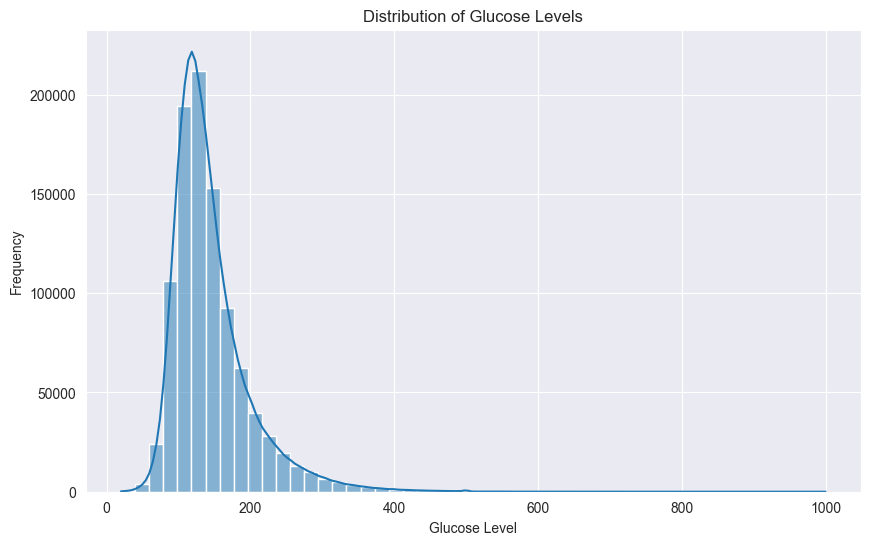

In [8]:
# Check the distribution of glucose - log scale
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['next_glucose'], bins=50, kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Check what the minimum next_glucose value is
min_next_glucose = df['next_glucose'].min()
print(f'Minimum next_glucose value: {min_next_glucose}')
print(f'Num. of min value occurrences: {len(df[df["next_glucose"] == min_next_glucose])}')

Minimum next_glucose value: 20.0
Num. of min value occurrences: 42


In [10]:
# Check what the maximum next_glucose value is
max_next_glucose = df['next_glucose'].max()
print(f'Minimum next_glucose value: {max_next_glucose}')
print(f'Num. of min value occurrences: {len(df[df["next_glucose"] == max_next_glucose])}')

Minimum next_glucose value: 1000.0
Num. of min value occurrences: 2


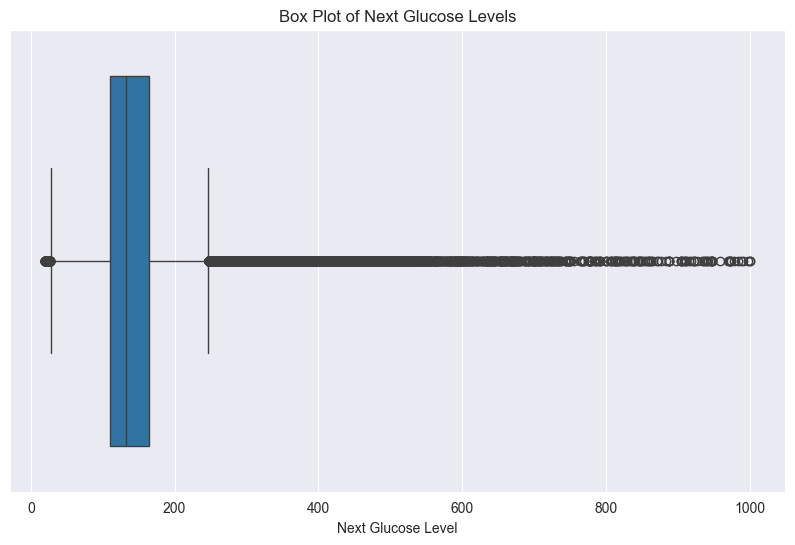

In [11]:
# Box plot to visualize the distribution of next_glucose
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['next_glucose'])
plt.title('Box Plot of Next Glucose Levels')
plt.xlabel('Next Glucose Level')
plt.show()

In [12]:
# Remove outliers based on the box plot
Q1 = df['next_glucose'].quantile(0.25)
Q3 = df['next_glucose'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['next_glucose'] >= Q1 - 1.5 * IQR) & (df['next_glucose'] <= Q3 + 1.5 * IQR)]
df.shape

(929491, 20)

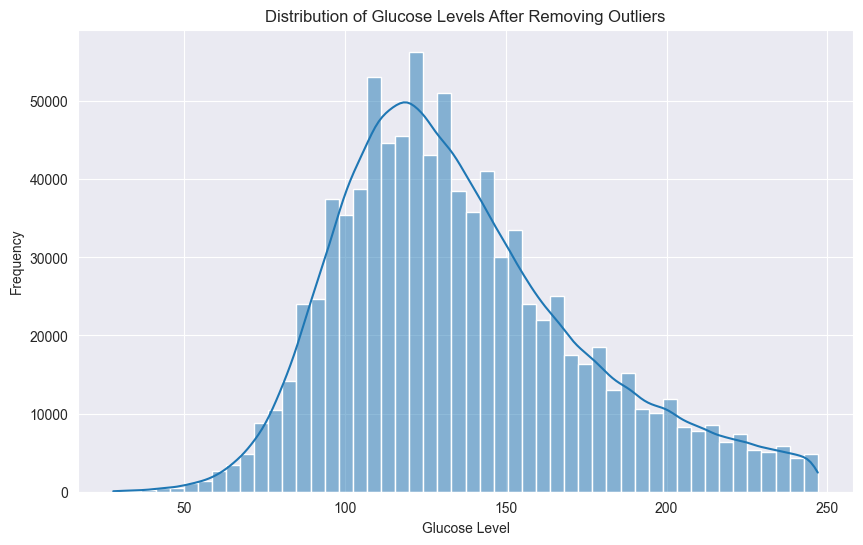

In [13]:
# check distribution of glucose again after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['next_glucose'], bins=50, kde=True)
plt.title('Distribution of Glucose Levels After Removing Outliers')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Check num of unique patients
df['subject_id'].nunique()
print(len(df['subject_id'].unique()))

35189


In [15]:
## Do svr on the data
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

In [16]:
# # divide data by label, i.e. into hypo, hyper, normal
# hypo_df = df[df['label'] == 'hypo']
# hyper_df = df[df['label'] == 'hyper']
# normal_df = df[df['label'] == 'normal']
# print(f"Hypo: {len(hypo_df)}, Hyper: {len(hyper_df)}, Normal: {len(normal_df)}")

In [17]:
# # check number of total rows
# rows = len(df)
# rows = rows * 0.035
# rows_per_label = rows / 3
# print(f"Total rows: {rows}, Rows per label: {rows_per_label}")

In [18]:
# # now take random sample of rows_per_label from each label
# hypo_sample = hypo_df.sample(n=int(rows_per_label), random_state=seed)
# hyper_sample = hyper_df.sample(n=int(rows_per_label), random_state=seed)
# normal_sample = normal_df.sample(n=int(rows_per_label), random_state=seed)

In [19]:
# # recombine the samples into one DataFrame and shuffle
# df_sample = pd.concat([hypo_sample, hyper_sample, normal_sample]).sample(frac=1, random_state=seed).reset_index(drop=True)
# df_sample.head()

In [20]:
# df_sample.shape
df_sample = df.copy()  # Use the entire dataset for now
df_sample = df_sample.sample(frac=0.1, random_state=seed)  # Sample 10% of the data for faster processing

In [21]:
# check the number of each patient type - hypo, hyper, normal
df_sample['label'].value_counts()
print(df_sample['label'].value_counts())

label
normal    78984
hyper     12754
hypo       1211
Name: count, dtype: int64


In [25]:
import pandas as pd
import numpy as np

# Step 1: Count label frequencies
label_counts = df_sample['label'].value_counts()

# Step 2: Compute inverse frequency weights
inv_freq = 1.0 / label_counts

# Step 3: Map sample weights to each row
df_sample['sample_weight'] = df_sample['label'].map(inv_freq)

# Step 4 (optional): Normalize to keep weights in a similar scale
df_sample['sample_weight'] *= len(df_sample) / df_sample['sample_weight'].sum()


In [29]:
# Split into train test

X = df_sample.drop(columns=['subject_id', 'next_glucose', 'label', 'charttime'])
y = df_sample['next_glucose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train.shape

(74359, 17)

In [28]:
from sklearn.preprocessing import StandardScaler

# Step 1: Separate sample weights
sample_weight_train = X_train['sample_weight'].values
sample_weight_test = X_test['sample_weight'].values

# Step 2: Drop sample_weight from the features
X_train_features = X_train.drop(columns=['sample_weight'])
X_test_features = X_test.drop(columns=['sample_weight'])

# Step 3: Scale features only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)
X_train_scaled[:5]

array([[-1.28839325e-01,  1.62446487e-01, -3.22618756e-01,
        -6.93917914e-01, -1.10074245e+00, -4.60741149e-01,
        -8.49164751e-01, -1.66064224e-01,  6.43817755e-01,
        -1.16610033e-02, -1.18817775e+00,  1.66270333e+00,
        -3.45157681e-01,  5.65651943e-01, -8.23237833e-01,
        -6.01823886e-01],
       [ 1.01937509e+00,  3.03272830e+00,  2.38831176e+00,
        -2.81397473e+00,  1.52521890e+00, -7.84438830e-01,
         1.27232345e+00, -1.23713377e+00, -1.61142247e+00,
        -7.28206065e-01,  1.61174690e-01, -9.84337628e-02,
        -1.59158226e+00, -1.27740434e+00,  1.20678239e+00,
        -5.20458915e-01],
       [-1.62692844e-02,  6.34712520e-02, -8.16687620e-01,
        -1.44273553e-01, -6.78949664e-01, -6.40236660e-01,
        -7.25595156e-01, -9.13488526e-01, -2.20570162e-01,
        -3.93180225e-01,  7.70347981e-01,  5.47473144e-02,
        -8.39621137e-01,  1.42381208e+00,  1.21481398e+00,
        -3.52314398e-01],
       [-8.38113090e-02, -1.90081105e

In [31]:
sample_weight_train[:5]

array([0.39226932, 2.42927709, 0.39226932, 0.39226932, 0.39226932])

In [32]:
# Train the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train, sample_weight=sample_weight_train)

SVR()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
y_pred = svr.predict(X_test_scaled)

# Weighted metrics
mse = mean_squared_error(y_test, y_pred, sample_weight=sample_weight_test)
mae = mean_absolute_error(y_test, y_pred, sample_weight=sample_weight_test)
r2 = r2_score(y_test, y_pred, sample_weight=sample_weight_test)

print(f"Weighted MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


Weighted MSE: 1494.2661, MAE: 27.0988, R²: 0.6217


In [35]:
rmse = root_mean_squared_error(y_test, y_pred, sample_weight=sample_weight_test)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 38.65573827331163


              precision    recall  f1-score   support

       hyper      0.535     0.611     0.570      2570
        hypo      0.162     0.433     0.236       252
      normal      0.925     0.879     0.902     15768

    accuracy                          0.836     18590
   macro avg      0.541     0.641     0.569     18590
weighted avg      0.861     0.836     0.847     18590



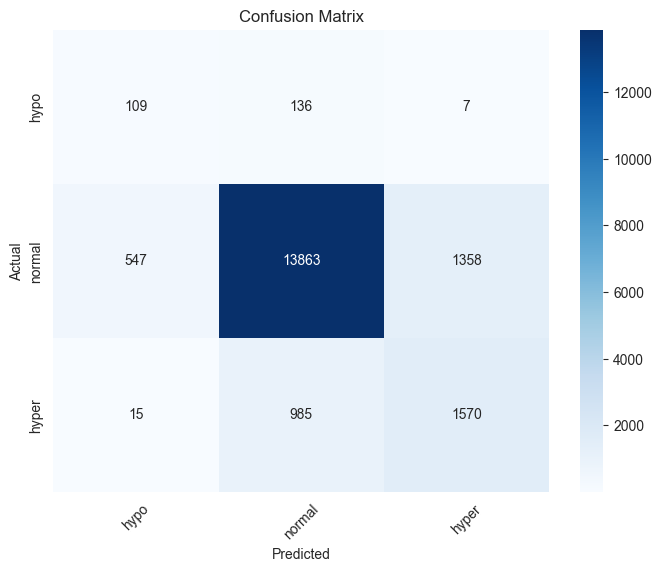

Sensitivity and Specificity per class:
Hypo — Sensitivity: 0.433, Specificity: 0.969
Normal — Sensitivity: 0.879, Specificity: 0.603
Hyper — Sensitivity: 0.611, Specificity: 0.915


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 1. Classification function
def classify_glucose(value):
    if value < 70:
        return 'hypo'
    elif value > 180:
        return 'hyper'
    else:
        return 'normal'

# 2. Apply classification
y_pred_classified = [classify_glucose(value) for value in y_pred]
y_test_classified = [classify_glucose(value) for value in y_test]

# 3. Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test_classified,
    'Predicted': y_pred_classified
})

# 4. Print classification report
print(classification_report(comparison_df['Actual'], comparison_df['Predicted'], digits=3))

# 5. Confusion Matrix and Plot
labels = ['hypo', 'normal', 'hyper']
conf_matrix = confusion_matrix(comparison_df['Actual'], comparison_df['Predicted'], labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.show()

# 6. Sensitivity and Specificity Calculation
print("Sensitivity and Specificity per class:")
for i, label in enumerate(labels):
    TP = conf_matrix[i, i]
    FN = np.sum(conf_matrix[i, :]) - TP
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - (TP + FN + FP)

    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    print(f"{label.capitalize()} — Sensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}")


In [37]:
sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
specificity = confusion[0, 0] / (confusion[0, 1] + confusion[0, 0])
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

NameError: name 'confusion' is not defined

In [ ]:
## for next time, get patient ids all the ones timestamped before hypo/hyper diagnosis, i.e. create a story of how the measurements changed and use this as an input for a classifier to the final diagnosis, either hypo or hyper or normal. don't need the actual timestamps as input, just the order of the measurements.